<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%203/infrared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

In [9]:
# Load Dataset
from google.colab import files

uploaded = files.upload()  # Upload file Infrared.csv
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

Saving Infrared.csv to Infrared (1).csv


In [10]:
# Preprocessing Data

# Mengubah kolom kategori menjadi numerik
df_numeric = df.copy()
categorical_cols = ['Gender', 'Age', 'Ethnicity']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_numeric[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder

# Mengisi nilai NaN dengan median
df_numeric.fillna(df_numeric.median(), inplace=True)

In [11]:
# Pisahkan Fitur dan Target
X = df_numeric.drop(columns=['aveOralM'])  # Semua fitur kecuali target
y = df_numeric['aveOralM']

# Bagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train Model
# K-NN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [13]:
# Prediksi
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Evaluasi Model
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"=== Evaluasi {model_name} ===")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R^2  : {r2:.4f}\n")

evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (K-NN)")
evaluate_model(y_test, y_pred_dt, "Decision Tree")

=== Evaluasi K-Nearest Neighbors (K-NN) ===
MSE  : 0.0955
RMSE : 0.3091
R^2  : 0.5464

=== Evaluasi Decision Tree ===
MSE  : 0.1136
RMSE : 0.3371
R^2  : 0.4604



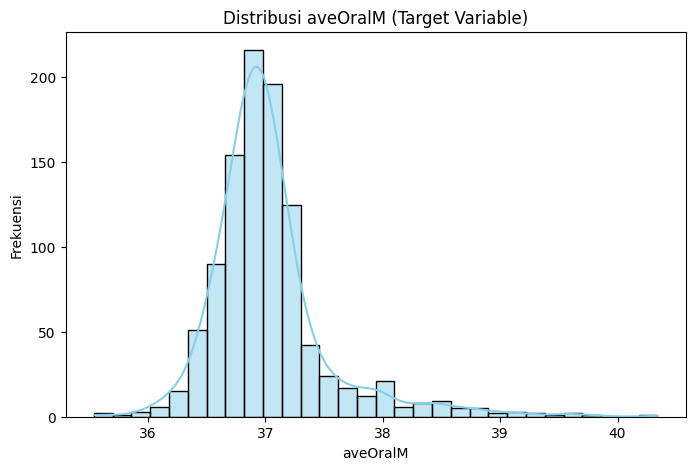

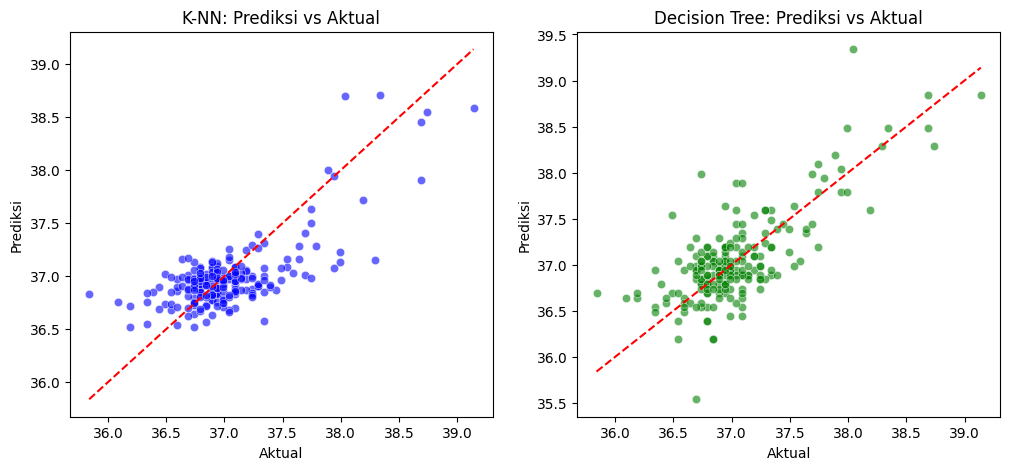

In [14]:
# Visualisasi
# Distribusi Data Target
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title("Distribusi aveOralM (Target Variable)")
plt.xlabel("aveOralM")
plt.ylabel("Frekuensi")
plt.show()

# Scatter Plot: Prediksi vs Data Aktual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_knn, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("K-NN: Prediksi vs Aktual")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_dt, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Decision Tree: Prediksi vs Aktual")

plt.show()

In [15]:
# Penjelasan Matematis
print("""
Persamaan yang digunakan:
1. Mean Squared Error (MSE)
   MSE = (1/n) * Σ (y_i - ŷ_i)^2

2. Root Mean Squared Error (RMSE)
   RMSE = sqrt(MSE)

3. R-Squared (R^2)
   R^2 = 1 - (Σ (y_i - ŷ_i)^2) / (Σ (y_i - ȳ)^2)
""")


Persamaan yang digunakan:
1. Mean Squared Error (MSE)
   MSE = (1/n) * Σ (y_i - ŷ_i)^2
   
2. Root Mean Squared Error (RMSE)
   RMSE = sqrt(MSE)
   
3. R-Squared (R^2)
   R^2 = 1 - (Σ (y_i - ŷ_i)^2) / (Σ (y_i - ȳ)^2)

